In [2]:
# Unit 4 HW - Portfolio Analysis Using Python

In [356]:
# Initial imports

In [95]:
import pandas as pd 
import numpy as np 
import datetime as dt 
from pathlib import Path
import seaborn as sns
import hvplot.pandas
%matplotlib inline

In [96]:
# Data cleaning - will read and clean each .csv file

In [97]:
# Using the pathlib library to set Path to the whale_returns.csv file
whale_returns_data = Path("Resources/whale_returns.csv")

In [98]:
# Read the Whale Returns CSV, create a dataframe, and display results
whale_df = pd.read_csv(whale_returns_data)
whale_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [99]:
# Converting the Whale_df into a DateTimeIndex 
whale_df.set_index(pd.to_datetime(whale_df['Date'], infer_datetime_format=True), inplace=True)
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-02,2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [100]:
# Drop the extra date column
whale_df.drop(columns=['Date'], inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [101]:
# calculate daily returns
whale_df_daily = whale_df.pct_change()
whale_df_daily.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381
2015-03-05,0.800968,0.257544,-1.929234,0.596558
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282


In [102]:
# Find null values
whale_df_daily.isnull().sum()

SOROS FUND MANAGEMENT LLC      16
PAULSON & CO.INC.              16
TIGER GLOBAL MANAGEMENT LLC    16
BERKSHIRE HATHAWAY INC         16
dtype: int64

In [103]:
# Drop null values
whale_df_daily.dropna(inplace=True)
whale_df_daily.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381
2015-03-05,0.800968,0.257544,-1.929234,0.596558
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840
2015-03-10,-18.625495,-2.263954,-3.067380,4.893672


In [104]:
# Change the appearance of the column names to reflect no spaces
columns = ["SOROS_FUND_MGMT_LLC", "PAULSON_&_CO_INC", "TIGER_GLOBAL_MGMT_LLC", "BERKSHIRE_HATHAWAY_INC"]
whale_df_daily.columns = columns
whale_df_daily.head()

,SOROS_FUND_MGMT_LLC,PAULSON_&_CO_INC,TIGER_GLOBAL_MGMT_LLC,BERKSHIRE_HATHAWAY_INC
Date,,,,
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381
2015-03-05,0.800968,0.257544,-1.929234,0.596558
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840
2015-03-10,-18.625495,-2.263954,-3.067380,4.893672


In [105]:
# Using the pathlib library to set Path to the algo_returns.csv file
algo_returns_data = Path("Resources/algo_returns.csv")

In [106]:
# Read the Algo Returns CSV, create a dataframe, and display results
algo_df = pd.read_csv(algo_returns_data)
algo_df

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [107]:
# Converting the algo_df into a DateTimeIndex 
algo_df.set_index(pd.to_datetime(algo_df["Date"], infer_datetime_format=True), inplace=True)
algo_df

,Date,Algo 1,Algo 2
Date,,,
2014-05-28,2014-05-28,0.001745,NaN
2014-05-29,2014-05-29,0.003978,NaN
2014-05-30,2014-05-30,0.004464,NaN
2014-06-02,2014-06-02,0.005692,NaN
2014-06-03,2014-06-03,0.005292,NaN
...,...,...,...
2019-04-25,2019-04-25,0.000682,-0.007247
2019-04-26,2019-04-26,0.002981,0.005256
2019-04-29,2019-04-29,0.005208,0.002829


In [108]:
# Drop the extra date column
algo_df.drop(columns=["Date"], inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [109]:
# calculate daily returns
algo_df_daily = algo_df.pct_change()
algo_df_daily.head()


,Algo 1,Algo 2
Date,,
2014-05-28,NaN,NaN
2014-05-29,1.280156,NaN
2014-05-30,0.122192,NaN
2014-06-02,0.275137,NaN
2014-06-03,-0.070296,NaN


In [110]:
# Find null values
algo_df_daily.isnull().sum()

Algo 1    1
Algo 2    7
dtype: int64

In [111]:
# Drop null values
algo_df_daily.dropna(inplace=True)
algo_df_daily.head()

,Algo 1,Algo 2
Date,,
2014-06-06,-0.542965,-0.376459
2014-06-09,-3.699288,-0.315757
2014-06-10,-1.879164,-1.129760
2014-06-11,0.080354,4.113963
2014-06-12,-1.005932,0.021230


In [112]:
# Change the appearance of the column names to reflect no spaces
columns = ["Algo_1", "Algo_2"]
algo_df_daily.columns = columns
algo_df_daily.head()

,Algo_1,Algo_2
Date,,
2014-06-06,-0.542965,-0.376459
2014-06-09,-3.699288,-0.315757
2014-06-10,-1.879164,-1.129760
2014-06-11,0.080354,4.113963
2014-06-12,-1.005932,0.021230


In [113]:
# Using the pathlib library to set Path to the sp500_history.csv file
sp500_historical_data = Path("Resources/sp500_history.csv")


In [114]:
# Read the S&P 500 History CSV, create a dataframe, and display results
sp500_df = pd.read_csv(sp500_historical_data)
sp500_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [115]:
# Converting the sp500_df into a DateTimeIndex 
sp500_df.set_index(pd.to_datetime(sp500_df["Date"], infer_datetime_format=True), inplace=True)
sp500_df


,Date,Close
Date,,
2019-04-23,23-Apr-19,$2933.68
2019-04-22,22-Apr-19,$2907.97
2019-04-18,18-Apr-19,$2905.03
2019-04-17,17-Apr-19,$2900.45
2019-04-16,16-Apr-19,$2907.06
...,...,...
2012-10-05,5-Oct-12,$1460.93
2012-10-04,4-Oct-12,$1461.40
2012-10-03,3-Oct-12,$1450.99


In [116]:
# Drop the extra date column
sp500_df.drop(columns=["Date"], inplace=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [117]:
# Clear "Close" field with $ symbol
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"]



Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: object

In [118]:
# Confirm datatype of S&P 500 df:
sp500_df.dtypes

Close    object
dtype: object

In [119]:
sp500_df["Close"] = sp500_df["Close"].astype("float")

In [120]:
sp500_df.dtypes

Close    float64
dtype: object

In [121]:
# calculate daily returns
sp500_df_daily = sp500_df.pct_change()
sp500_df_daily.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [122]:
# Find null values of the daily returns 
sp500_df_daily.isnull()

,Close
Date,
2019-04-23,True
2019-04-22,False
2019-04-18,False
2019-04-17,False
2019-04-16,False
...,...
2012-10-05,False
2012-10-04,False
2012-10-03,False


In [123]:
# Drop null values of the daily returns df
sp500_df_daily.dropna(inplace=True)
sp500_df_daily.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [124]:
columns = ["Returns"]
sp500_df_daily.columns = columns
sp500_df_daily.head()



,Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [125]:
# Combine the cleaned up dataframes by column, create an inner join
three_returns = pd.concat([whale_df_daily, algo_df_daily, sp500_df_daily], axis="columns", join="inner")


In [126]:
# Sort datetime index in ascending order 
three_returns.sort_index(inplace=True)


In [127]:
three_returns.head()

,SOROS_FUND_MGMT_LLC,PAULSON_&_CO_INC,TIGER_GLOBAL_MGMT_LLC,BERKSHIRE_HATHAWAY_INC,Algo_1,Algo_2,Returns
Date,,,,,,,
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.001195
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,0.014378
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-0.003929
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,0.017254
2015-03-10,-18.625495,-2.263954,-3.067380,4.893672,-0.744524,-10.327163,0.001921


In [128]:
# Calculate Daily returns of all portfolios

In [129]:
three_daily_returns = three_returns.pct_change
three_daily_returns()

,SOROS_FUND_MGMT_LLC,PAULSON_&_CO_INC,TIGER_GLOBAL_MGMT_LLC,BERKSHIRE_HATHAWAY_INC,Algo_1,Algo_2,Returns
Date,,,,,,,
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,-1.289988,-1.156012,-1.468984,-1.363449,-1.259704,-1.222647,-13.035127
2015-03-06,-4.706095,-8.287443,1.385337,-5.940478,-5.714254,-5.625914,-1.273267
2015-03-09,-0.638313,0.162729,-0.632996,-0.703510,-0.976392,-0.694949,-5.391499
2015-03-10,16.347725,0.037439,0.816193,-6.600194,-8.526717,8.272708,-0.888644
...,...,...,...,...,...,...,...
2019-04-15,-2.888517,-0.989590,-0.881105,-0.845327,-0.949694,-0.479815,-1.808331
2019-04-16,1.316622,180.811054,2.410092,-0.556434,-3.837777,-0.188941,-5.476395
2019-04-17,-0.284726,12.222427,-2.394458,-3.640471,-0.199037,0.715298,-1.691797


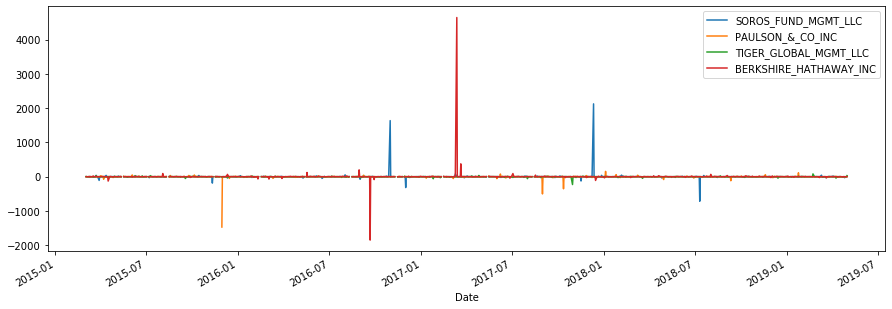

In [130]:
# Plot daily returns of the whale_df portfolio 
whale_df_daily.plot(figsize=(15,5))


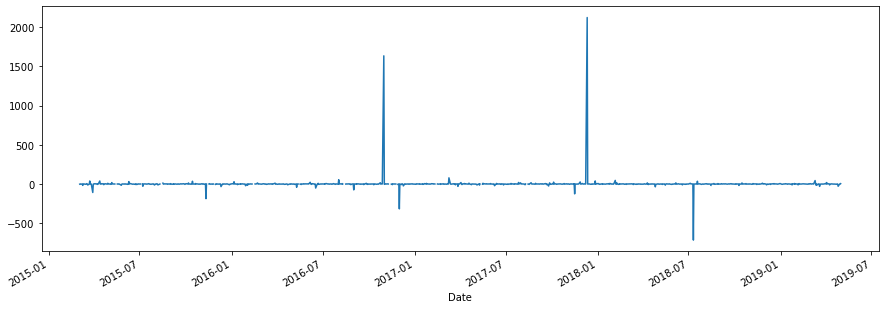

In [131]:
# Plot Soros Fund Management LLC portion of portfolio:
whale_df_daily["SOROS_FUND_MGMT_LLC"].plot(figsize=(15,5))


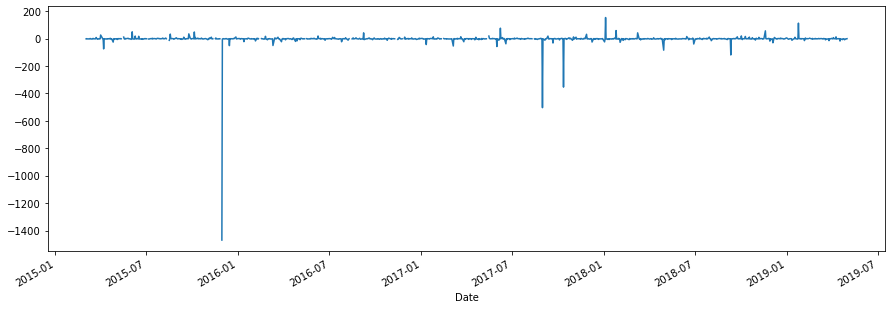

In [132]:
# Plot Paulson & Co. Inc. portion of portfolio:
whale_df_daily["PAULSON_&_CO_INC"].plot(figsize=(15,5))


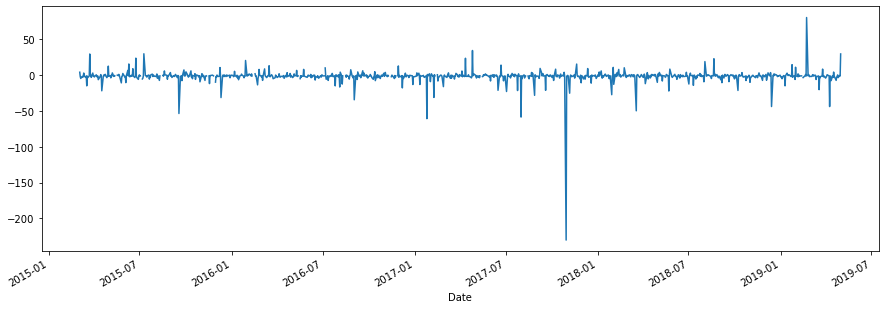

In [133]:
# Plot Tiger Global Mgmt portion of portfolio:
whale_df_daily["TIGER_GLOBAL_MGMT_LLC"].plot(figsize=(15,5))


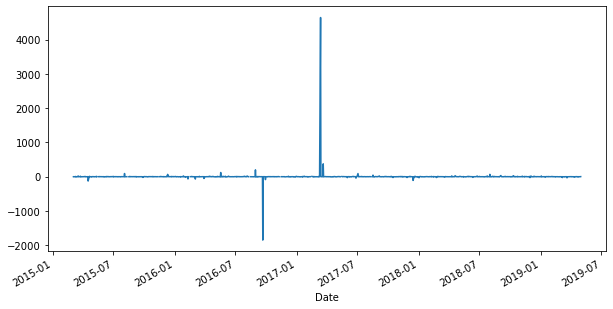

In [134]:
# Plot Berkshire Hathaway Inc. portion of portfolio:
whale_df_daily["BERKSHIRE_HATHAWAY_INC"].plot(figsize=(10,5))


In [135]:
# Plot daily returns of algo_df portfolio:
algo_df_daily.hvplot(figsize=(15,5), ylabel="Returns", title="Daily Returns, In-House Trading Algorithm")


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

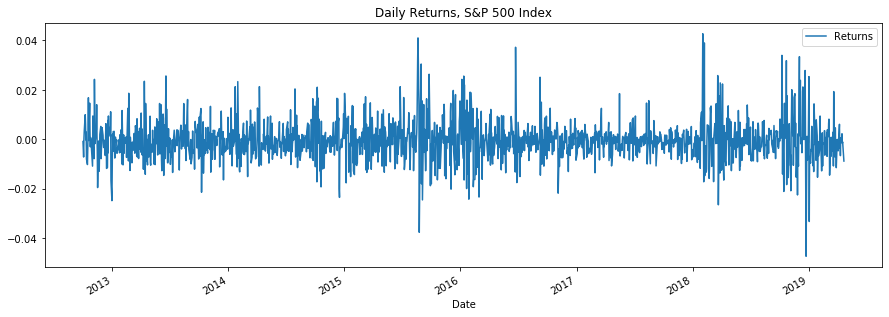

In [136]:
# Plot daily returns of sp500:
sp500_df_daily.plot(figsize=(15,5), title="Daily Returns, S&P 500 Index")

In [137]:
# Calculate cumulative returns of all portfolios
cumulative_ret = (1 + three_returns).cumprod() -1
cumulative_ret

,SOROS_FUND_MGMT_LLC,PAULSON_&_CO_INC,TIGER_GLOBAL_MGMT_LLC,BERKSHIRE_HATHAWAY_INC,Algo_1,Algo_2,Returns
Date,,,,,,,
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.001195
2015-03-05,-4.173432,-1.818399,-5.751772,-2.024002,-0.508246,-5.553173,0.013166
2015-03-06,5.246788,-0.282397,16.115278,0.994020,1.552226,11.070068,0.009185
2015-03-09,-1.460116,-1.848387,-12.790828,-0.748434,1.804686,-2.372559,0.026598
2015-03-10,7.109764,0.072323,23.376117,0.482649,-0.283470,11.802080,0.028570
...,...,...,...,...,...,...,...
2019-04-15,NaN,NaN,NaN,NaN,36.629909,-392.015375,-0.240240
2019-04-16,NaN,NaN,NaN,NaN,59.335457,246.988918,-0.238508
2019-04-17,NaN,NaN,NaN,NaN,88.495205,-448.166220,-0.239709


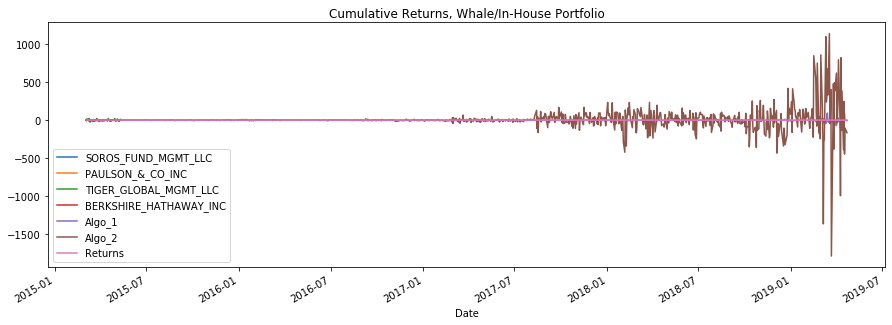

In [138]:
# Plot cumulative returns for all returns in the Whale and In-House Trading Portfolio:
cumulative_ret.plot(figsize=(15,5), title="Cumulative Returns, Whale/In-House Portfolio")

In [139]:
sp500_cumulative = cumulative_ret.drop(columns=["SOROS_FUND_MGMT_LLC", "PAULSON_&_CO_INC", "TIGER_GLOBAL_MGMT_LLC", "BERKSHIRE_HATHAWAY_INC", "Algo_1", "Algo_2"])

In [140]:
# Plot cumulative return of sp500:
sp500_cumulative.hvplot(figsize=(10,5), title="Cumulative Returns, S&P 500 Index")

:Curve   [Date]   (Returns)

In [141]:
# Creating a box plot for each portfolio determining Risk

In [142]:
# Creating a box plot for "Whale" portfolio to show risk
whale_df.hvplot.box(title="Box Plot for All Portfolios", xlabel=" ", ylabel="Returns")

:BoxWhisker   [Variable]   (value)

In [143]:
# Creating a box plot for "Algo" portfolio to show risk
algo_df.hvplot.box(xlabel="In-House Trading Algorithm", ylabel="Returns")

:BoxWhisker   [Variable]   (value)

In [144]:
# Creating a box plot for "sp500" portfolio to show risk
sp500_daily.hvplot.box(xlabel="S&P 500 ", ylabel="Returns")

NameError: name 'sp500_daily' is not defined

In [145]:
# Calculate the daily standard deviations of all portfolios 
returns_std = pd.concat([whale_df, algo_df], axis="columns", join="inner")
returns_std.sort_index(inplace=True)
daily_std = returns_std.std()
daily_std


SOROS FUND MANAGEMENT LLC      0.007879
PAULSON & CO.INC.              0.007010
TIGER GLOBAL MANAGEMENT LLC    0.010876
BERKSHIRE HATHAWAY INC         0.012892
Algo 1                         0.007602
Algo 2                         0.008323
dtype: float64

In [146]:
# Identify the stock with the most risk
daily_std = daily_std.sort_values(ascending=False)
daily_std


BERKSHIRE HATHAWAY INC         0.012892
TIGER GLOBAL MANAGEMENT LLC    0.010876
Algo 2                         0.008323
SOROS FUND MANAGEMENT LLC      0.007879
Algo 1                         0.007602
PAULSON & CO.INC.              0.007010
dtype: float64

In [147]:
# Calculate the daily standard deviation of the S&P 500
sp500_df_daily.std()

Returns    0.008135
dtype: float64

In [148]:
# Calculate the annualized standard deviation(asd) (252 trading days)
volatility = returns_std.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.              0.111281
Algo 1                         0.120679
SOROS FUND MANAGEMENT LLC      0.125080
Algo 2                         0.132131
TIGER GLOBAL MANAGEMENT LLC    0.172648
BERKSHIRE HATHAWAY INC         0.204650
dtype: float64

In [149]:
# Rolling Statistics

In [150]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
returns_21 = three_returns.rolling(window=21).std()
returns_21

,SOROS_FUND_MGMT_LLC,PAULSON_&_CO_INC,TIGER_GLOBAL_MGMT_LLC,BERKSHIRE_HATHAWAY_INC,Algo_1,Algo_2,Returns
Date,,,,,,,
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-15,8.626427,5.199824,10.330389,7.883090,16.056634,12.204205,0.006532
2019-04-16,8.605039,5.199858,10.307832,7.871626,16.057707,12.142604,0.006571
2019-04-17,8.602155,6.127927,9.803148,7.870612,16.035317,12.131804,0.006505


In [151]:
returns_21 = returns_21.dropna()
returns_21

,SOROS_FUND_MGMT_LLC,PAULSON_&_CO_INC,TIGER_GLOBAL_MGMT_LLC,BERKSHIRE_HATHAWAY_INC,Algo_1,Algo_2,Returns
Date,,,,,,,
2015-04-01,25.738805,2.543597,7.790222,6.152640,2.405490,6.531348,0.009128
2015-04-02,25.783124,6.440469,7.743646,6.150680,2.257687,6.463892,0.009260
2015-04-06,25.786745,6.441953,7.738737,6.156434,2.439476,6.464576,0.008711
2015-04-07,25.797658,6.428786,7.682228,6.116056,2.172527,6.407041,0.008687
2015-04-08,25.779682,17.677820,7.694878,6.209570,2.271321,6.433593,0.007772
...,...,...,...,...,...,...,...
2019-04-15,8.626427,5.199824,10.330389,7.883090,16.056634,12.204205,0.006532
2019-04-16,8.605039,5.199858,10.307832,7.871626,16.057707,12.142604,0.006571
2019-04-17,8.602155,6.127927,9.803148,7.870612,16.035317,12.131804,0.006505


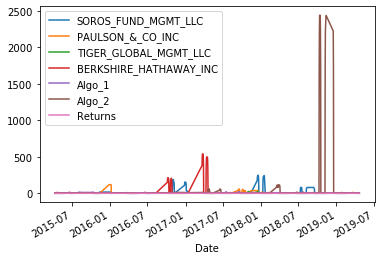

In [152]:
# Plot the rolling standard deviation
returns_21.rolling(window=7).std().plot()

In [153]:
# Calculate the correlation 
# First, redo daily returns
daily_ret_redo = returns_21.pct_change()
daily_ret_redo


,SOROS_FUND_MGMT_LLC,PAULSON_&_CO_INC,TIGER_GLOBAL_MGMT_LLC,BERKSHIRE_HATHAWAY_INC,Algo_1,Algo_2,Returns
Date,,,,,,,
2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-02,0.001722,1.532031,-0.005979,-0.000319,-0.061444,-0.010328,0.014444
2015-04-06,0.000140,0.000231,-0.000634,0.000935,0.080520,0.000106,-0.059257
2015-04-07,0.000423,-0.002044,-0.007302,-0.006559,-0.109429,-0.008900,-0.002690
2015-04-08,-0.000697,1.749791,0.001647,0.015290,0.045475,0.004144,-0.105358
...,...,...,...,...,...,...,...
2019-04-15,-0.036897,-0.003153,0.001282,-0.000911,-0.000655,-0.000944,-0.003030
2019-04-16,-0.002479,0.000007,-0.002184,-0.001454,0.000067,-0.005048,0.005930
2019-04-17,-0.000335,0.178480,-0.048961,-0.000129,-0.001394,-0.000889,-0.010030


In [154]:
# Drop na's
daily_ret_redo = daily_ret_redo.dropna()
daily_ret_redo

,SOROS_FUND_MGMT_LLC,PAULSON_&_CO_INC,TIGER_GLOBAL_MGMT_LLC,BERKSHIRE_HATHAWAY_INC,Algo_1,Algo_2,Returns
Date,,,,,,,
2015-04-02,0.001722,1.532031,-0.005979,-0.000319,-0.061444,-0.010328,0.014444
2015-04-06,0.000140,0.000231,-0.000634,0.000935,0.080520,0.000106,-0.059257
2015-04-07,0.000423,-0.002044,-0.007302,-0.006559,-0.109429,-0.008900,-0.002690
2015-04-08,-0.000697,1.749791,0.001647,0.015290,0.045475,0.004144,-0.105358
2015-04-09,-0.006053,0.000321,-0.003129,-0.010305,0.004382,-0.076818,0.002375
...,...,...,...,...,...,...,...
2019-04-15,-0.036897,-0.003153,0.001282,-0.000911,-0.000655,-0.000944,-0.003030
2019-04-16,-0.002479,0.000007,-0.002184,-0.001454,0.000067,-0.005048,0.005930
2019-04-17,-0.000335,0.178480,-0.048961,-0.000129,-0.001394,-0.000889,-0.010030


In [155]:
# Calculate the correlation
correlation = daily_ret_redo.corr()
correlation

,SOROS_FUND_MGMT_LLC,PAULSON_&_CO_INC,TIGER_GLOBAL_MGMT_LLC,BERKSHIRE_HATHAWAY_INC,Algo_1,Algo_2,Returns
SOROS_FUND_MGMT_LLC,1.000000,-0.001309,-0.048290,0.026596,0.034753,0.002499,0.130953
PAULSON_&_CO_INC,-0.001309,1.000000,0.074715,0.030421,-0.075608,-0.009573,0.210001
TIGER_GLOBAL_MGMT_LLC,-0.048290,0.074715,1.000000,-0.012400,-0.007250,-0.003457,-0.005988
BERKSHIRE_HATHAWAY_INC,0.026596,0.030421,-0.012400,1.000000,-0.003869,-0.001076,0.234050
Algo_1,0.034753,-0.075608,-0.007250,-0.003869,1.000000,-0.000913,-0.097430
Algo_2,0.002499,-0.009573,-0.003457,-0.001076,-0.000913,1.000000,0.031174
Returns,0.130953,0.210001,-0.005988,0.234050,-0.097430,0.031174,1.000000


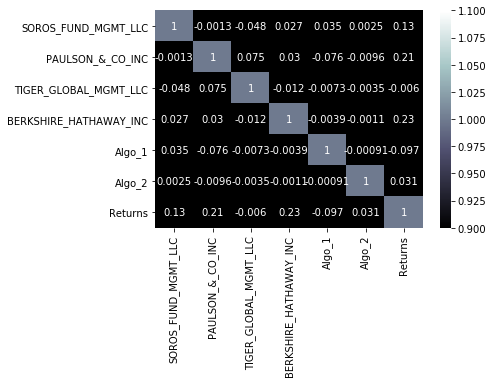

In [158]:
# Display correlation matrix
sns.heatmap(correlation, vmin=1, vmax=1, annot=True, cmap="bone")

In [63]:
#Save Cleansed Data to New CSV:
# Save modified DataFrame to the Resources folder. 
# Use the `index` parameter set to `False` to exclude saving the index.
#people_df.to_csv("../Resources/people_cleansed.csv", index=False)